Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.

1.1. Теоретический материал – Линейные регрессионные модели

Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).


1.1.1 Пример

Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

In [1]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

0.9999999999999997 -0.949999999999999


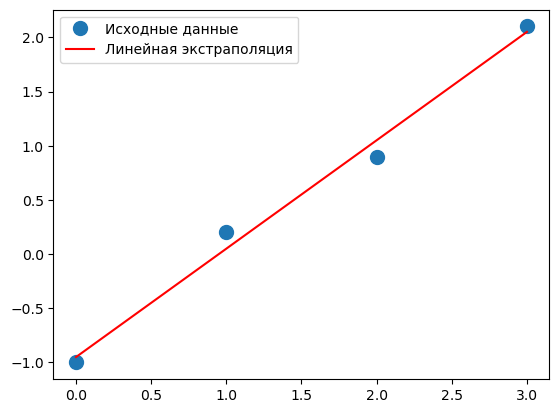

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример

Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.


In [9]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [10]:
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)

[-5.44083541 -4.24337816 -2.7972939  -1.95730001 -0.7142697   0.2592018
  1.4980812   1.8124045   2.73949203  4.14825341  4.535135  ]
[25.48850235 16.01094544  8.92224257  4.19831421  0.702923   -0.41368714
  0.76138014  3.80147509  8.5619731  16.3016166  24.54550792]


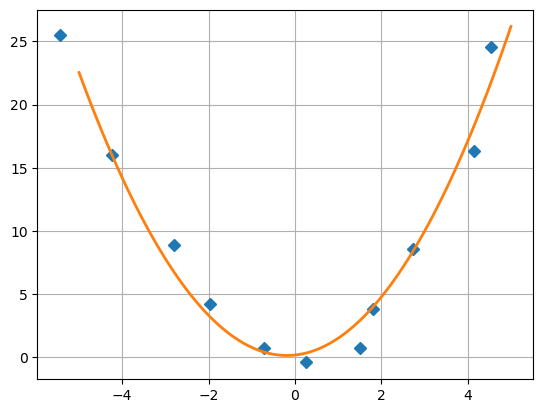

In [14]:
m = vstack((x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

1.1.3 Пример

По данным предыдущего примера постройте экстраполяционного полинома
третьего порядка


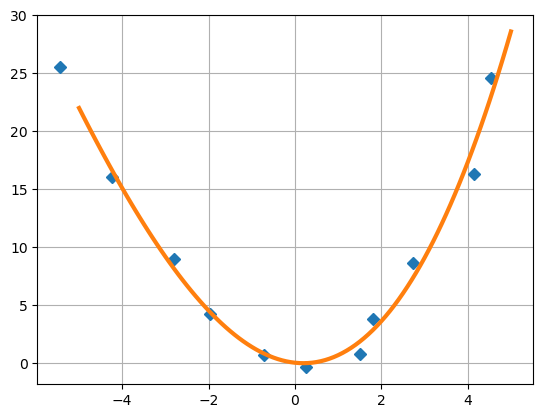

In [18]:
m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

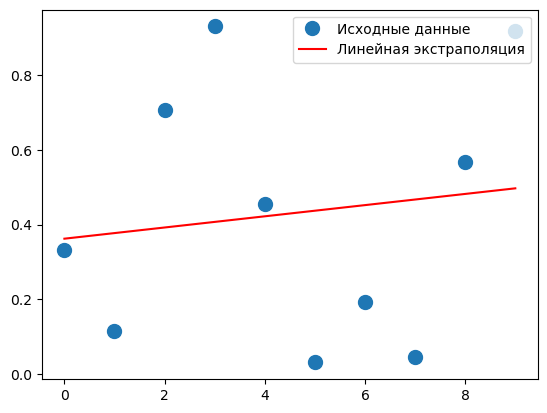

In [5]:
# linear
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.random.random(10)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

Задание:

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.


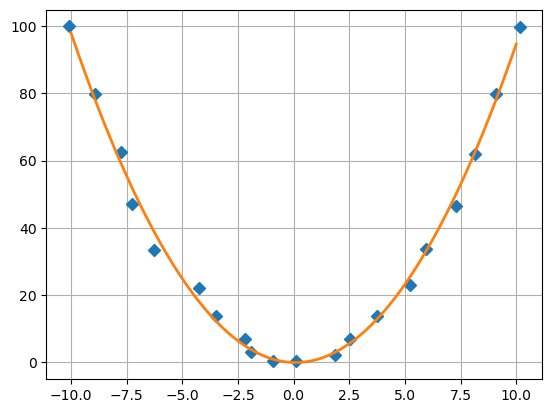

In [35]:
# парабола

delta = 1.0
x = linspace(-10, 10, 20)
y = x ** 2 + delta * (rand(20) - 0.5)
x += delta * (rand(20) - 0.5)

m = vstack((x ** 2, x, ones(20))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-10, 10, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

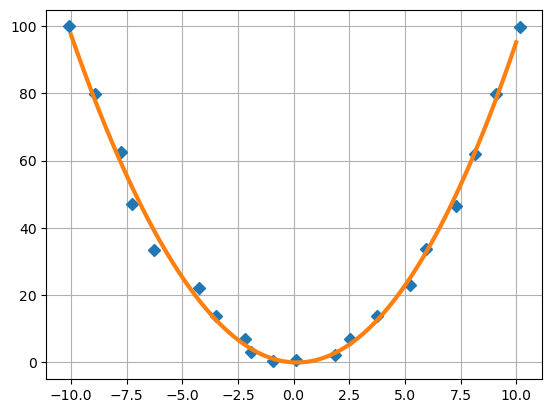

In [36]:
# 3-й степени

m = vstack((x ** 3, x ** 2, x, ones(20))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-10, 10, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

1.1.4 Пример

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)


0.00014489798647308758
0.07472195522288498


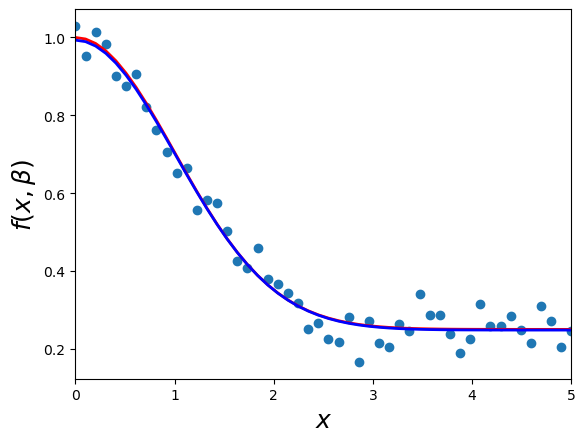

In [40]:
import scipy as sp
from scipy.optimize import curve_fit

beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

1.1.5 Пример

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1


[0.25421165 0.75184749]
0.00012094321250497676
0.10634661781087063


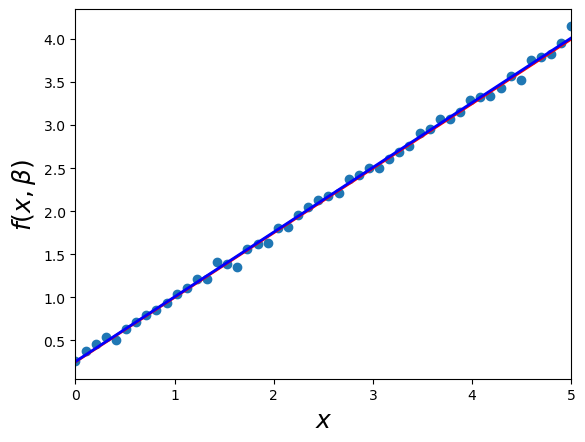

0.00012094321250497676
0.07495488758196253


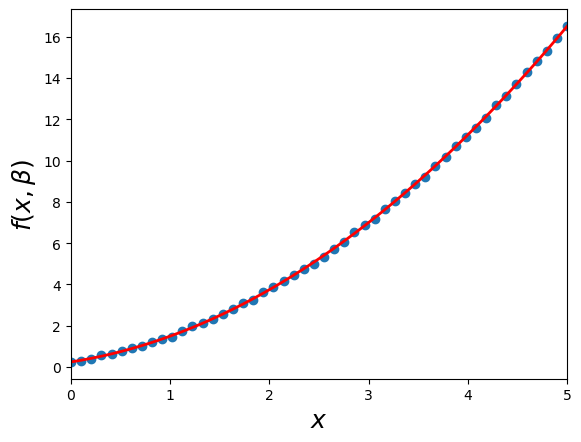

[0.98225687 2.02332344]
4.765550435117003e-05
0.11020055927103826


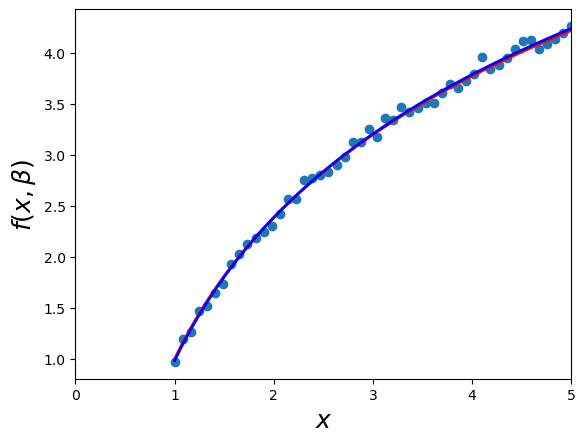

[1.00027228 2.00016952]
4.561397658888153e-06
0.10849679835292024


Text(0, 0.5, '$f(x, \\beta)$')

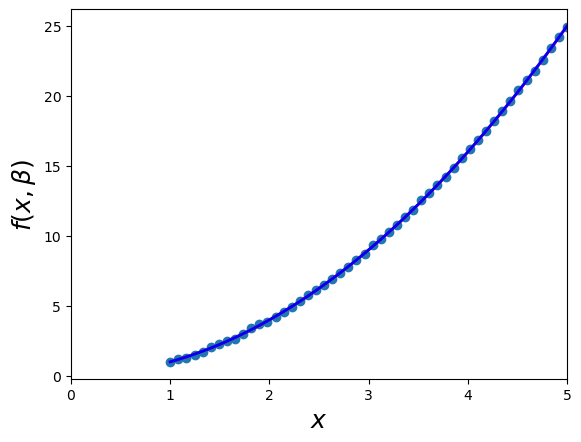

In [1]:
#Решение
#1
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + b1 * x


#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
#Решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x


#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#cоздаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


#Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отелонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)

Задание:

Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.


[0.12224761 0.33099972]
0.00012046598205679071
0.10592698681046578


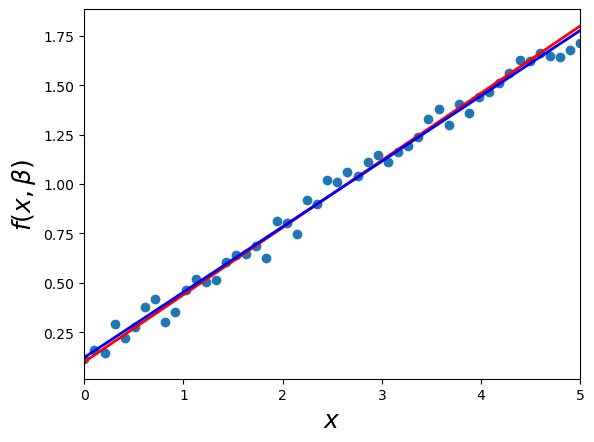

0.00012046598205679071
0.134404136624153


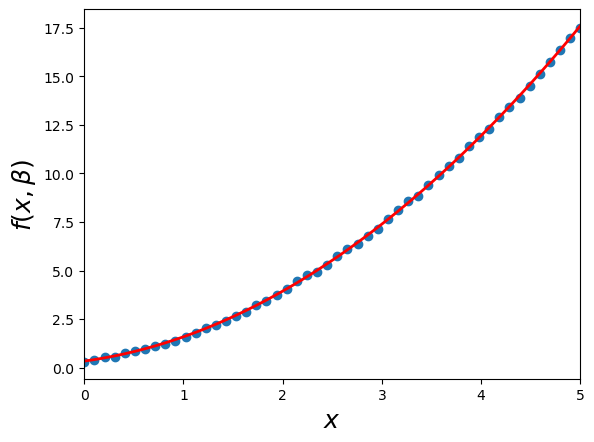

[ 9.99125434 10.01054468]
5.458734023243509e-05
0.1262300212463373


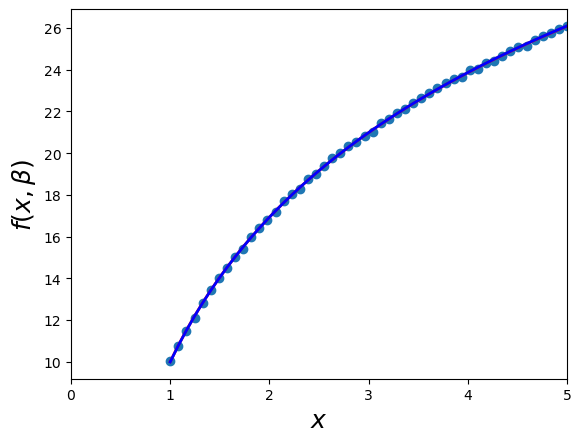

[1.00192702 2.998771  ]
6.073765213332477e-07
0.11843703676026932


Text(0, 0.5, '$f(x, \\beta)$')

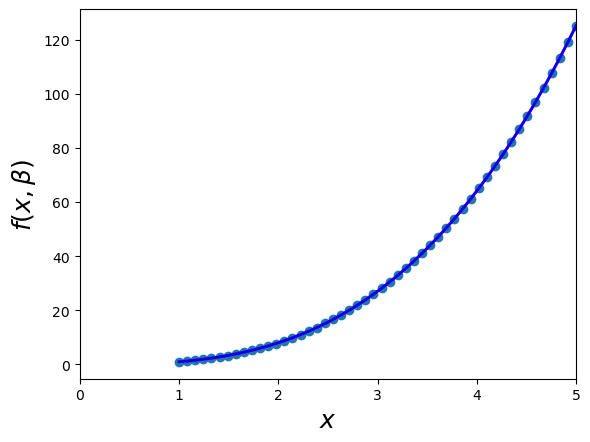

In [6]:
#Решение
#1
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.1, 0.34)


def f(x, b0, b1):
    return b0 + b1 * x


#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
#Решение
#2
beta = (0.34, 0.7, 0.55)


def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x


#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#cоздаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#3
beta = (10, 10)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


#Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отелонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1, 3)


def f(x, b0, b1):
    return b0 * x ** b1


#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)

1.2 Теоретический материал - Задачи регрессии

Линейная регрессия - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией. В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.


1.2.1 Пример

Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00,
                             2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75,
                             4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75,
                      62, 73, 81, 76, 64, 82, 90, 93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [9]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.887500,53.700000
std,1.501041,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.875000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


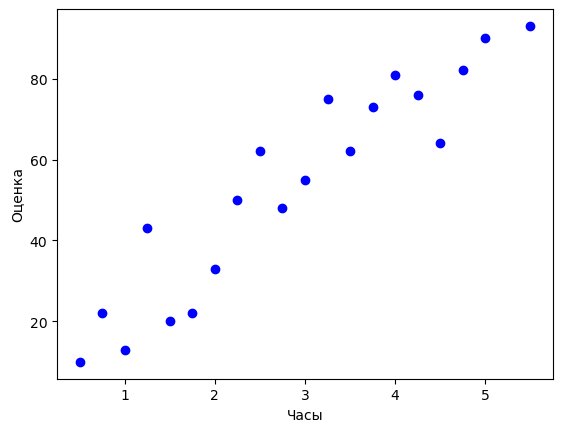

In [8]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label="данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [12]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

3.1686320754716846
[17.18867925]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [15]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,89.112028
1,22,16.060142
2,93,97.706368
3,62,46.140330


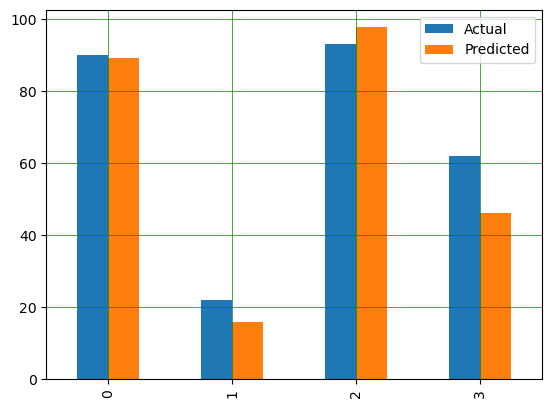

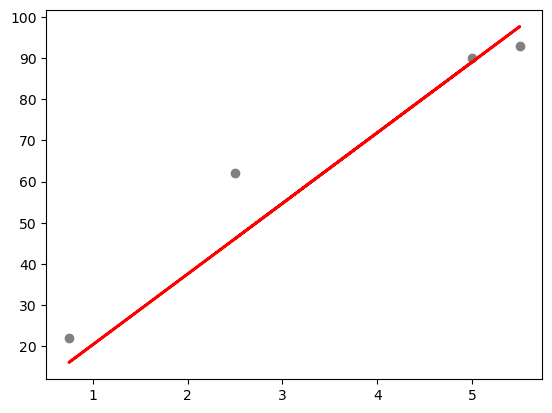

In [16]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#Построим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color="red", linewidth=2)
plt.show()

Задание:

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.


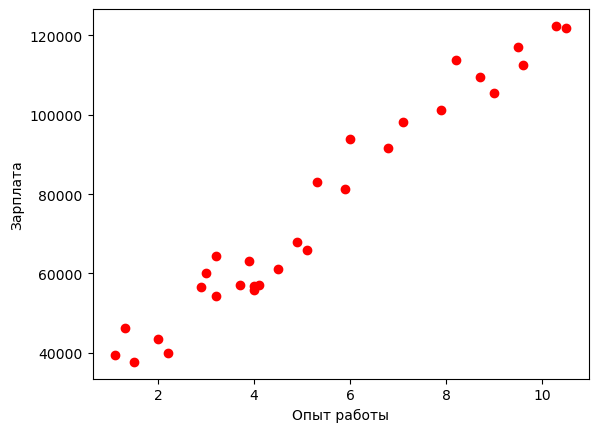

Intercept: 27275.40097799508 Coef:  9183.592437483361


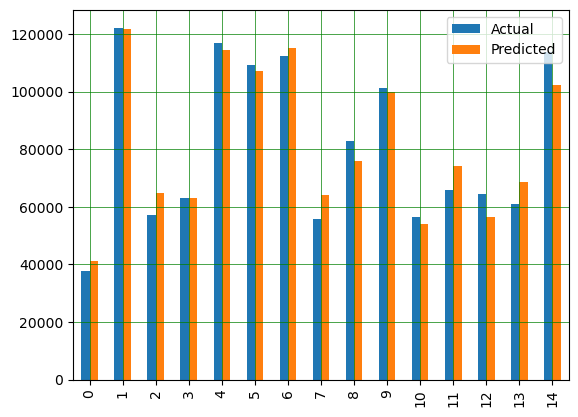

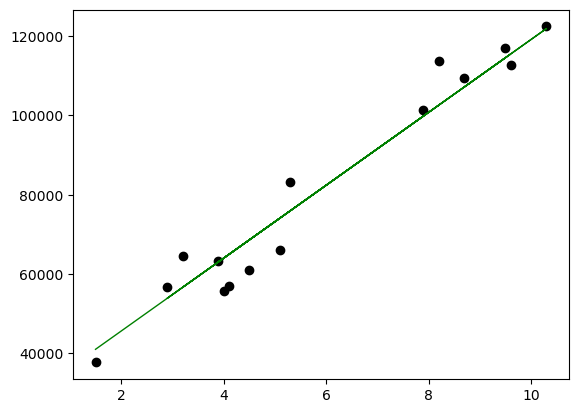

,Actual,Predicted
0,37731.0,41050.789634
1,122391.0,121866.403084
2,57081.0,64928.129972
3,63218.0,63091.411484
4,116969.0,114519.529134
5,109431.0,107172.655184
6,112635.0,115437.888378
7,55794.0,64009.770728
8,83088.0,75948.440897
9,101302.0,99825.781234


In [29]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)

years_experience = df['YearsExperience'].to_numpy()
salary = df['Salary'].to_numpy()

dictionary = {
    'years_experience': years_experience,
    'salary': salary
}

dataset = pd.DataFrame(dictionary)

plt.scatter(dataset['years_experience'], dataset['salary'], color='r', label='данные з/п')
plt.xlabel("Опыт работы")
plt.ylabel("Зарплата")
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# коэф
print(f'Intercept: {regressor.intercept_} Coef:  {float(regressor.coef_)}')

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='green', linewidth=1)
plt.show()
df

1.3. Теоретический материал – Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.


1.3.1 Пример

Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.


In [30]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
x = np.transpose(x)
x = np.c_[x, np.ones(x.shape[0])]
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример

1.3.2 Пример

Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.


In [31]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
#формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [32]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [33]:
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [34]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [35]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df

,Actual,Predict
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [36]:
#Последний шаг - оценить производительность алгоритмов. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3272699242343065


Задание

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2.
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

url = r"https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"

dataframe_raw = pd.read_csv(url, on_bad_lines='skip')

petrol_tax = dataframe_raw.iloc[:, 0].values  # pt
avg_income = dataframe_raw.iloc[:, 1].values  # ai
paved_highways = dataframe_raw.iloc[:, 2].values  # ph
pop_driver_license = dataframe_raw.iloc[:, 3].values  # pdl
petrol_consumption = dataframe_raw.iloc[:, 4].values  # pc

df_pt = pd.DataFrame(np.array(petrol_tax).transpose())
df_ai = pd.DataFrame(np.array(avg_income).transpose())
df_ph = pd.DataFrame(np.array(paved_highways).transpose())
df_pdl = pd.DataFrame(np.array(pop_driver_license).transpose())
df_pc = pd.DataFrame(np.array(petrol_consumption).transpose())

df_pt = df_pt.rename(columns={0: 'Petrol tax'}, inplace=False)
df_ai = df_ai.rename(columns={0: 'Average income'}, inplace=False)
df_ph = df_ph.rename(columns={0: 'Paved Highways'}, inplace=False)
df_pdl = df_pdl.rename(columns={0: 'Population Driver licence'}, inplace=False)
df_pc = df_pc.rename(columns={0: 'Petrol Consumption'}, inplace=False)

frames = [df_pt, df_ai, df_ph, df_pdl, df_pc]
dataset = pd.concat(frames, axis=1, join="inner")
dataset

,Petrol tax,Average income,Paved Highways,Population Driver licence,Petrol Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [7]:
x = dataset[['Petrol tax', 'Average income', 'Paved Highways', 'Population Driver licence']]
y = dataset['Petrol Consumption']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coefficient_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  3307.87066396728


In [8]:
coefficient_df

,Coefficient
Petrol tax,-44.480205
Average income,-0.070439
Paved Highways,-0.006585
Population Driver licence,1293.646006


In [9]:
df

,Actual,Predict
29,534,468.446949
4,410,550.475773
26,577,589.922533
30,571,572.151628
32,577,648.442611
37,704,645.441003
34,487,517.913312
40,587,669.802235
7,467,499.668226
10,580,496.656659


,Actual,Predicted
29,534,468.446949
4,410,550.475773
26,577,589.922533
30,571,572.151628
32,577,648.442611
37,704,645.441003
34,487,517.913312
40,587,669.802235
7,467,499.668226
10,580,496.656659


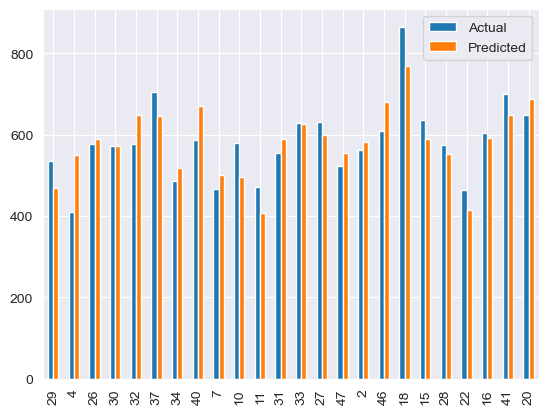

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind='bar')
df

Задание* вариант 8

Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.


In [15]:
x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([3.0, 2.0, 5.0, 2.0, 2.0, 3.0])
#Переписываем линейное уравнение y = mx + c, как y = Ap, где A = [[x1]] и p = [[m], [c]]
A = np.vstack([x, np.ones(len(x))]).T
print(A)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

[[5.  1. ]
 [5.2 1. ]
 [5.4 1. ]
 [5.6 1. ]
 [5.8 1. ]
 [6.  1. ]]
-0.42857142857142483 5.190476190476168


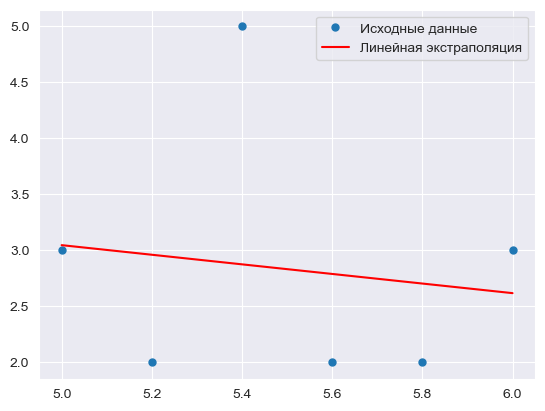

In [22]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='Исходные данные', markersize=5)
plt.plot(x, m * x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

In [23]:
m = np.vstack((x ** 2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
print(s)

[ -0.89285714   9.39285714 -21.71428571]


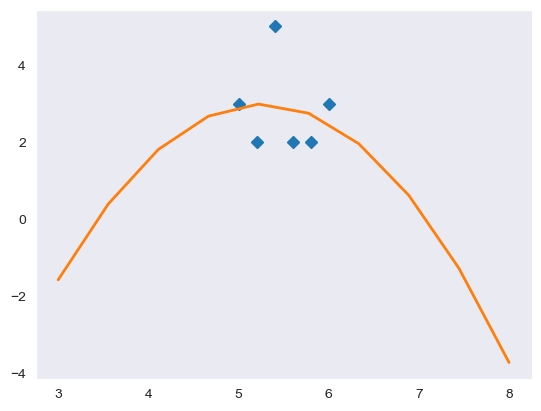

In [40]:
x_prec = np.linspace(3, 8, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
